In [1]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATA AND SETTING UP OUR DATAFRAME TO BE USED FOR MODEL

In [2]:
#Read data
df = pd.read_csv('final_data copy.csv')

/Users/gauravbhandari11/da/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3291: DtypeWarning: Columns (24,25,26,27,51,91,96,108,125,126,127,128,129,130,131,132,133,134,135,150,151,152,216,217,218,219,220,221,222,223,225) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Defining the columns we want to keep to build our model
features_to_use = [
    'URBRRL', 'REGION', 'SEX_A', 'AGE_FINAL', 'RACEALLP_A', 'MARSTAT_FINAL',
    'EMPWRKLSW1_A', 'EDUC_FINAL', 'PCNTADTWKP_A', 'INCWRKO_A', 'RATCAT_A', 'NOTCOV_A',
    'INSUR_COVERAGE', 'PAYBLL12M_A', 'MEDNG12M_A', 'LASTDR_A', 'WELLNESS_A',
    'USUALPL_A', 'USPLKIND_A', 'URGNT12MTC_A', 'EMERG12MTC_A',
    'SHTFLU12M_A', 'ANGEV_A', 'MIEV_A', 'CHDEV_A', 'CHLEV_A',
    'HYPEV_A', 'COPDEV_A', 'ASEV_A', 'CANEV_A', 'ARTHEV_A', 'DEMENEV_A', 'DIBEV_A',
    'BMICAT_A', 'ANXFREQ_A', 'DEPFREQ_A', 'MHTHRPY_A', 'MHTHDLY_A', 'PHSTAT_A',
    'SOCERRNDS_A', 'HEARINGDF_A', 'DIFF_A', 'VISIONDF_A', 'COMDIFF_A', 'COGMEMDFF_A',
    'UPPSLFCR_A'
]

In [4]:
# Creating the df that selects only the columns we will use in our model
df_model = df[features_to_use]

In [5]:
df_model

,URBRRL,REGION,SEX_A,AGE_FINAL,RACEALLP_A,MARSTAT_FINAL,EMPWRKLSW1_A,EDUC_FINAL,PCNTADTWKP_A,INCWRKO_A,...,MHTHRPY_A,MHTHDLY_A,PHSTAT_A,SOCERRNDS_A,HEARINGDF_A,DIFF_A,VISIONDF_A,COMDIFF_A,COGMEMDFF_A,UPPSLFCR_A
0,Large Fringe Metro,South,Male,75 and over,White only,Divorced/Separated/Widowed,No,High School Diploma or GED,0 adults,No,...,No,No,Very Good,No difficulty,Some difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
1,Nonmetropolitan,South,Male,45-64,White only,Married,Yes,College Degree or Higher,1 adult,Yes,...,No,No,Good,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty
2,Nonmetropolitan,South,Female,18-44,White only,Married,Yes,College Degree or Higher,1 adult,Yes,...,No,No,Good,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
3,Nonmetropolitan,South,Female,65-74,White only,Not Married but living with partner,No,Associate Degree/Some College,0 adults,No,...,No,No,Very Good,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
4,Large Central Metro,South,Female,75 and over,Black/African American only,Divorced/Separated/Widowed,No,Associate Degree/Some College,0 adults,No,...,No,No,Very Good,Some difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120693,Nonmetropolitan,West,Female,65-74,White only,Married,No,College Degree or Higher,0 adults,No,...,No,No,Very Good,No difficulty,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty
120694,Nonmetropolitan,West,Female,18-44,Hispanic,Married,Yes,Associate Degree/Some College,1 adult,Yes,...,No,No,Fair,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty
120695,Nonmetropolitan,West,Female,65-74,White only,Married,No,High School Diploma or GED,0 adults,No,...,No,No,Very Good,No difficulty,Some difficulty,Some difficulty,Some difficulty,A lot of difficulty,Some difficulty,No difficulty
120696,Nonmetropolitan,West,Male,45-64,White only,Married,No,Associate Degree/Some College,0 adults,No,...,No,No,Good,No difficulty,Some difficulty,No difficulty,Some difficulty,Some difficulty,Some difficulty,No difficulty


In [6]:
#Replacing responses such as Don't Know and Refused with NANs
non_informative_responses = ["Don't Know", 'Not Ascertained', 'Refused']
for column in df_model.columns:
    df_model[column] = df_model[column].replace(non_informative_responses, np.nan)

/Users/gauravbhandari11/da/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Checking the initial number of rows in our df
initial_count = len(df_model)
print(initial_count)

120698


In [8]:
#Removing rows with NaN values/Uninformative responses for each critical feature including target variable
for feature in features_to_use:
    initial_count = len(df_model)
    df_model = df_model[df_model[feature].notna()]
    print(f"Removed {initial_count - len(df_model)} rows due to NAN in {feature}.")

Removed 0 rows due to NAN in URBRRL.
Removed 0 rows due to NAN in REGION.
Removed 10 rows due to NAN in SEX_A.
Removed 300 rows due to NAN in AGE_FINAL.
Removed 0 rows due to NAN in RACEALLP_A.
Removed 0 rows due to NAN in MARSTAT_FINAL.
Removed 3852 rows due to NAN in EMPWRKLSW1_A.
Removed 531 rows due to NAN in EDUC_FINAL.
Removed 394 rows due to NAN in PCNTADTWKP_A.
Removed 1001 rows due to NAN in INCWRKO_A.
Removed 0 rows due to NAN in RATCAT_A.
Removed 216 rows due to NAN in NOTCOV_A.
Removed 0 rows due to NAN in INSUR_COVERAGE.
Removed 178 rows due to NAN in PAYBLL12M_A.
Removed 52 rows due to NAN in MEDNG12M_A.
Removed 139 rows due to NAN in LASTDR_A.
Removed 512 rows due to NAN in WELLNESS_A.
Removed 34 rows due to NAN in USUALPL_A.
Removed 9512 rows due to NAN in USPLKIND_A.
Removed 149 rows due to NAN in URGNT12MTC_A.
Removed 66 rows due to NAN in EMERG12MTC_A.
Removed 316 rows due to NAN in SHTFLU12M_A.
Removed 216 rows due to NAN in ANGEV_A.
Removed 42 rows due to NAN in MI

In [9]:
#Checking the number of observations/rows in the final df that we will be using to build our model
len(df_model)

101805

Type of place for usual care? Frequencies:
 A doctor's office or health center                               90615
Urgent care center or clinic in a drug store or grocery store     6569
A VA Medical Center or VA outpatient clinic                       2140
Hospital emergency room                                           1450
Some other place                                                   737
Does not go to one place most often                                294
Name: USPLKIND_A, dtype: int64

Type of place for usual care? Proportions (%):
 A doctor's office or health center                               89.008398
Urgent care center or clinic in a drug store or grocery store     6.452532
A VA Medical Center or VA outpatient clinic                       2.102058
Hospital emergency room                                           1.424292
Some other place                                                  0.723933
Does not go to one place most often                               0.288787


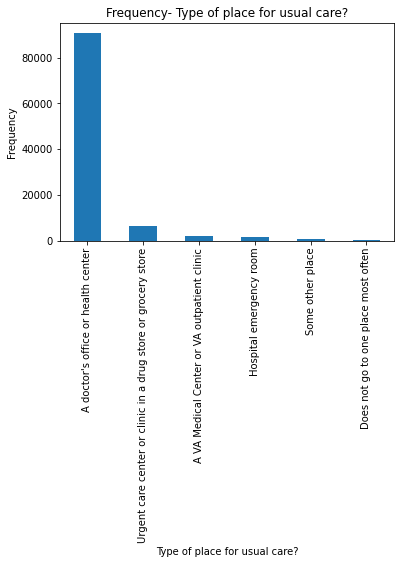

In [10]:
#Checking the distribution of the responses of our target variable (Type of Place for Usual Care) 
usual_placetype_freq = df_model['USPLKIND_A'].value_counts()
usual_placetype_props = df_model['USPLKIND_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Type of place for usual care? Frequencies:\n", usual_placetype_freq)
print("\nType of place for usual care? Proportions (%):\n", usual_placetype_props)

# Plot bar chart for URBRRL
usual_placetype_freq.plot(kind='bar')
plt.title("Frequency- Type of place for usual care?")
plt.xlabel("Type of place for usual care?")
plt.ylabel('Frequency')
plt.show()

Since our target variable USUAL PLACE KIND is not a binary variable and has more than one category
we encode our target variable, but this automatically chooses the reference category based on 
alphabetical order, so we discard this method and encode the target variable ourselves as shown below the commented sections

In [11]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# # Separate the target variable 'USPLKIND_A' and features
# y = df_model['USPLKIND_A']
# X = df_model.drop(['USPLKIND_A'], axis=1)

In [ ]:
# y

In [ ]:
# X

In [ ]:
# # Encoding the target variable to have numeric categories
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)

In [ ]:
# y_encoded

In [ ]:
# # Create a mapping from original categories to encoded labels
# label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# # Convert the mapping to a DataFrame for easy reading
# mapping_df = pd.DataFrame(list(label_mapping.items()), columns=['Original Category', 'Encoded Label'])

# # Display the DataFrame
# print(mapping_df)

We will do the following steps in place of LabelEncoder so that we can encode our target variable
and create its reference category based on its most frequent response and we will compare other responses within the target variable to the reference category while interpreting our model

In [12]:
# Determine the most frequent category for the target variable
most_freq_category = df_model['USPLKIND_A'].value_counts().idxmax()
print("Most frequent category for USPLKIND_A:", most_freq_category)

Most frequent category for USPLKIND_A: A doctor's office or health center


In [13]:
# Exclude the most frequent category from encoding
categories = df_model['USPLKIND_A'].unique()
categories = [cat for cat in categories if cat != most_freq_category]

In [14]:
categories

['Urgent care center or clinic in a drug store or grocery store',
 'A VA Medical Center or VA outpatient clinic',
 'Hospital emergency room',
 'Some other place',
 'Does not go to one place most often']

In [15]:
# Manually encoding the target variable to numeric categories, setting the reference category to 0
df_model['USPLKIND_A_encoded'] = df_model['USPLKIND_A'].apply(lambda x: categories.index(x) + 1 if x in categories else 0)

# Check the mapping
print("Mapping of encoded categories with reference category set to 0:")
for i, category in enumerate([most_freq_category] + categories):
    print(f"{category}: {i}")


Mapping of encoded categories with reference category set to 0:
A doctor's office or health center: 0
Urgent care center or clinic in a drug store or grocery store: 1
A VA Medical Center or VA outpatient clinic: 2
Hospital emergency room: 3
Some other place: 4
Does not go to one place most often: 5


In [16]:
df_model

,URBRRL,REGION,SEX_A,AGE_FINAL,RACEALLP_A,MARSTAT_FINAL,EMPWRKLSW1_A,EDUC_FINAL,PCNTADTWKP_A,INCWRKO_A,...,MHTHDLY_A,PHSTAT_A,SOCERRNDS_A,HEARINGDF_A,DIFF_A,VISIONDF_A,COMDIFF_A,COGMEMDFF_A,UPPSLFCR_A,USPLKIND_A_encoded
0,Large Fringe Metro,South,Male,75 and over,White only,Divorced/Separated/Widowed,No,High School Diploma or GED,0 adults,No,...,No,Very Good,No difficulty,Some difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty,0
1,Nonmetropolitan,South,Male,45-64,White only,Married,Yes,College Degree or Higher,1 adult,Yes,...,No,Good,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,0
2,Nonmetropolitan,South,Female,18-44,White only,Married,Yes,College Degree or Higher,1 adult,Yes,...,No,Good,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty,0
3,Nonmetropolitan,South,Female,65-74,White only,Not Married but living with partner,No,Associate Degree/Some College,0 adults,No,...,No,Very Good,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty,0
4,Large Central Metro,South,Female,75 and over,Black/African American only,Divorced/Separated/Widowed,No,Associate Degree/Some College,0 adults,No,...,No,Very Good,Some difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120693,Nonmetropolitan,West,Female,65-74,White only,Married,No,College Degree or Higher,0 adults,No,...,No,Very Good,No difficulty,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,0
120694,Nonmetropolitan,West,Female,18-44,Hispanic,Married,Yes,Associate Degree/Some College,1 adult,Yes,...,No,Fair,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,0
120695,Nonmetropolitan,West,Female,65-74,White only,Married,No,High School Diploma or GED,0 adults,No,...,No,Very Good,No difficulty,Some difficulty,Some difficulty,Some difficulty,A lot of difficulty,Some difficulty,No difficulty,0
120696,Nonmetropolitan,West,Male,45-64,White only,Married,No,Associate Degree/Some College,0 adults,No,...,No,Good,No difficulty,Some difficulty,No difficulty,Some difficulty,Some difficulty,Some difficulty,No difficulty,0


LOGISTIC REGRESSION MODEL: Splitting into predictors (X) and target variable (y)

In [18]:
# Separate the target variable 'USPLKIND_A_encoded' and features
y = df_model['USPLKIND_A_encoded']
X = df_model.drop(['USPLKIND_A', 'USPLKIND_A_encoded'], axis=1)

In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
120693    0
120694    0
120695    0
120696    0
120697    0
Name: USPLKIND_A_encoded, Length: 101805, dtype: int64

In [20]:
X

,URBRRL,REGION,SEX_A,AGE_FINAL,RACEALLP_A,MARSTAT_FINAL,EMPWRKLSW1_A,EDUC_FINAL,PCNTADTWKP_A,INCWRKO_A,...,MHTHRPY_A,MHTHDLY_A,PHSTAT_A,SOCERRNDS_A,HEARINGDF_A,DIFF_A,VISIONDF_A,COMDIFF_A,COGMEMDFF_A,UPPSLFCR_A
0,Large Fringe Metro,South,Male,75 and over,White only,Divorced/Separated/Widowed,No,High School Diploma or GED,0 adults,No,...,No,No,Very Good,No difficulty,Some difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
1,Nonmetropolitan,South,Male,45-64,White only,Married,Yes,College Degree or Higher,1 adult,Yes,...,No,No,Good,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty
2,Nonmetropolitan,South,Female,18-44,White only,Married,Yes,College Degree or Higher,1 adult,Yes,...,No,No,Good,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
3,Nonmetropolitan,South,Female,65-74,White only,Not Married but living with partner,No,Associate Degree/Some College,0 adults,No,...,No,No,Very Good,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
4,Large Central Metro,South,Female,75 and over,Black/African American only,Divorced/Separated/Widowed,No,Associate Degree/Some College,0 adults,No,...,No,No,Very Good,Some difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty,No difficulty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120693,Nonmetropolitan,West,Female,65-74,White only,Married,No,College Degree or Higher,0 adults,No,...,No,No,Very Good,No difficulty,No difficulty,No difficulty,Some difficulty,No difficulty,No difficulty,No difficulty
120694,Nonmetropolitan,West,Female,18-44,Hispanic,Married,Yes,Associate Degree/Some College,1 adult,Yes,...,No,No,Fair,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty
120695,Nonmetropolitan,West,Female,65-74,White only,Married,No,High School Diploma or GED,0 adults,No,...,No,No,Very Good,No difficulty,Some difficulty,Some difficulty,Some difficulty,A lot of difficulty,Some difficulty,No difficulty
120696,Nonmetropolitan,West,Male,45-64,White only,Married,No,Associate Degree/Some College,0 adults,No,...,No,No,Good,No difficulty,Some difficulty,No difficulty,Some difficulty,Some difficulty,Some difficulty,No difficulty


DEFINING OUR REFERENCE CATEGORIES FOR EACH FEATURE BASED ON HIGHEST FREQUENCY

In [21]:
# Create a function to select reference categories for all feature variables based on highest frequency
def ref_cats(data, list_obj):
    for i, j in data.iteritems():
        v = data[i].value_counts().sort_values(ascending=False).index[0]
        ref_cat = i + '_'+ str(v)  # prefixing the category name with the feature name in line with dummy variable naming convention
        list_obj.append(ref_cat)  # appending each top category to a list
    print(list_obj)

cat_list=[] # initialise empty list to store category values
#This prints the list of all the reference categories for each feature variable, which are the most frequent responses
ref_cats(X, cat_list) 

['URBRRL_Medium and Small Metro', 'REGION_South', 'SEX_A_Female', 'AGE_FINAL_18-44', 'RACEALLP_A_White only', 'MARSTAT_FINAL_Married', 'EMPWRKLSW1_A_Yes', 'EDUC_FINAL_College Degree or Higher', 'PCNTADTWKP_A_1 adult', 'INCWRKO_A_Yes', 'RATCAT_A_5.00 or greater', 'NOTCOV_A_Covered', 'INSUR_COVERAGE_Private', 'PAYBLL12M_A_No', 'MEDNG12M_A_No', 'LASTDR_A_Within the past year', 'WELLNESS_A_Yes', 'USUALPL_A_Yes', 'URGNT12MTC_A_0 times', 'EMERG12MTC_A_0 times', 'SHTFLU12M_A_Yes', 'ANGEV_A_No', 'MIEV_A_No', 'CHDEV_A_No', 'CHLEV_A_No', 'HYPEV_A_No', 'COPDEV_A_No', 'ASEV_A_No', 'CANEV_A_No', 'ARTHEV_A_No', 'DEMENEV_A_No', 'DIBEV_A_No', 'BMICAT_A_Overweight', 'ANXFREQ_A_A few times a year', 'DEPFREQ_A_Never', 'MHTHRPY_A_No', 'MHTHDLY_A_No', 'PHSTAT_A_Very Good', 'SOCERRNDS_A_No difficulty', 'HEARINGDF_A_No difficulty', 'DIFF_A_No difficulty', 'VISIONDF_A_No difficulty', 'COMDIFF_A_No difficulty', 'COGMEMDFF_A_No difficulty', 'UPPSLFCR_A_No difficulty']


PREPARING DUMMY VARIABLES TO FIT LOGISITC REGRESSION MODEL FOR CATEGORICAL DATA

In [22]:
# Convert categorical feature variables into dummy/indicator variables
X_dummy = pd.get_dummies(X, drop_first=False)

# Drop the reference categories
X_dummy = X_dummy.drop(cat_list, axis=1)

# Check the number of variables before and after
print(f'Before: {X.shape}')
print(f'After: {X_dummy.shape}')

Before: (101805, 45)
After: (101805, 121)


In [23]:
X_dummy

,URBRRL_Large Central Metro,URBRRL_Large Fringe Metro,URBRRL_Nonmetropolitan,REGION_Midwest,REGION_Northeast,REGION_West,SEX_A_Male,AGE_FINAL_45-64,AGE_FINAL_65-74,AGE_FINAL_75 and over,...,VISIONDF_A_Some difficulty,COMDIFF_A_A lot of difficulty,COMDIFF_A_Cannot do at all,COMDIFF_A_Some difficulty,COGMEMDFF_A_A lot of difficulty,COGMEMDFF_A_Cannot do at all,COGMEMDFF_A_Some difficulty,UPPSLFCR_A_A lot of difficulty,UPPSLFCR_A_Cannot do at all,UPPSLFCR_A_Some difficulty
0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120693,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
120694,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120695,0,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
120696,0,0,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# # Fit the multinomial logistic regression model
# # Using MNLogit as the target variable has more than two levels
# multinom_logit = sm.MNLogit(y_encoded, sm.add_constant(X_dummy)).fit_regularized()
# print(multinom_logit.summary())

RESULTS OF MULTINOMIAL LOGIT MODEL

In [24]:
# Fit the multinomial logistic regression model using the manually encoded target variable
multinom_logit = sm.MNLogit(y, sm.add_constant(X_dummy)).fit_regularized()
print(multinom_logit.summary())

Iteration limit reached    (Exit mode 9)
            Current function value: 0.36138999405244454
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/Users/gauravbhandari11/da/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:     USPLKIND_A_encoded   No. Observations:               101805
Model:                        MNLogit   Df Residuals:                   101195
Method:                           MLE   Df Model:                          605
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.2388
Time:                        20:03:02   Log-Likelihood:                -36791.
converged:                      False   LL-Null:                       -48336.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             USPLKIND_A_encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -3.3357      0.071    -46.909      0.000      -3.475      -3.196
URBRRL_Large C

In [28]:
# Assuming multinom_logit is your fitted MNLogit model
# predicted_probabilities = multinom_logit.predict(sm.add_constant(X_dummy))

In [27]:
# predicted_probabilities.head(20)

In [ ]:
# def custom_summary(multinom_logit_model, label_mapping):
#     # Get the summary as a string and then split it into lines
#     summary_str = multinom_logit_model.summary().as_text()
#     summary_lines = summary_str.split('\n')

#     # Find lines that contain the encoded labels and replace them with original category names
#     new_summary_lines = []
#     for line in summary_lines:
#         if line.strip().startswith('y_encoded'):
#             # Extract the encoded label
#             encoded_label = int(line.strip().split('=')[1].split()[0])
#             # Find the corresponding original category name from the label_mapping
#             original_category = list(label_mapping.keys())[list(label_mapping.values()).index(encoded_label)]
#             # Replace the line with the original category name
#             line = line.replace(f'y_encoded={encoded_label}', f'USPLKIND_A="{original_category}"')
#         new_summary_lines.append(line)

#     # Join the modified lines back into a single string
#     modified_summary_str = '\n'.join(new_summary_lines)
#     print(modified_summary_str)

# # Assume multinom_logit is your fitted MNLogit model and label_mapping is your mapping dictionary
# # Call the function to print the modified summary
# custom_summary(multinom_logit, label_mapping)
